In [23]:
import warnings
warnings.filterwarnings('ignore')
db = pd.read_csv("loan_approval.csv")
print("\n Dataset Loaded Successfully!\n")

pd.set_option('display.max_columns', None)
print("First 10 Rows:")
print(db.head(10))

print("\n Shape of Dataset:", db.shape)

print("\n Dataset Information:")
print(db.info())
print("\n Summary Statistics:")
print(db.describe())


 Dataset Loaded Successfully!

First 10 Rows:
              name              city  income  credit_score  loan_amount  \
0     Allison Hill         East Jill  113810           389        39698   
1     Brandon Hall     New Jamesside   44592           729        15446   
2     Rhonda Smith      Lake Roberto   33278           584        11189   
3  Gabrielle Davis  West Melanieview  127196           344        48823   
4     Valerie Gray         Mariastad   66048           496        47174   
5   Darren Roberts   Port Jesseville   62098           689        19217   
6       Holly Wood       Lake Joseph   59256           373        40920   
7  Nicholas Martin        Nelsonside   48289           524        45866   
8      Patty Perez   Port Leslieview  126530           367        14826   
9       Emily Rios    Wilkersonmouth   43434           446        18359   

   years_employed  points  loan_approved  
0              27    50.0          False  
1              28    55.0          False 

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# ------------------------------------------------------
# STEP 1: DATA LOADING & PREPROCESSING
# ------------------------------------------------------

# Load your dataset
try:
    # Use a relative path (assumes file is in the same folder)
    db = pd.read_csv("loan_approval.csv")
except FileNotFoundError:
    print("Error: loan_approval.csv not found.")
    print("Please make sure the file is in the same directory as your script.")
    exit()

print("--- Initial Data Inspection ---")
print(db.head())

# Prepare Data for Analysis
db_analysis = db.drop(['name', 'city'], axis=1)
db_analysis['loan_approved'] = db_analysis['loan_approved'].astype(int)

# Check for missing or zero values
print("\nChecking for Missing Values (Initial):")
print(db_analysis.isnull().sum())
columns_with_zero = ['loan_amount']
db_analysis[columns_with_zero] = db_analysis[columns_with_zero].replace(0, np.nan)


--- Initial Data Inspection ---
              name              city  income  credit_score  loan_amount  \
0     Allison Hill         East Jill  113810           389        39698   
1     Brandon Hall     New Jamesside   44592           729        15446   
2     Rhonda Smith      Lake Roberto   33278           584        11189   
3  Gabrielle Davis  West Melanieview  127196           344        48823   
4     Valerie Gray         Mariastad   66048           496        47174   

   years_employed  points  loan_approved  
0              27    50.0          False  
1              28    55.0          False  
2              13    45.0          False  
3              29    50.0          False  
4               4    25.0          False  

Checking for Missing Values (Initial):
income            0
credit_score      0
loan_amount       0
years_employed    0
points            0
loan_approved     0
dtype: int64


In [10]:
numeric_cols = db_analysis.select_dtypes(include=np.number).columns
for col in numeric_cols:
    if db_analysis[col].isnull().sum() > 0:
        db_analysis[col].fillna(db_analysis[col].median(), inplace=True)
print("\n Missing values handled successfully!")
print(db_analysis.isnull().sum())


 Missing values handled successfully!
income            0
credit_score      0
loan_amount       0
years_employed    0
points            0
loan_approved     0
dtype: int64



Plotting Distributions...
Saved feature distributions plot to 'loan_feature_distributions.png'


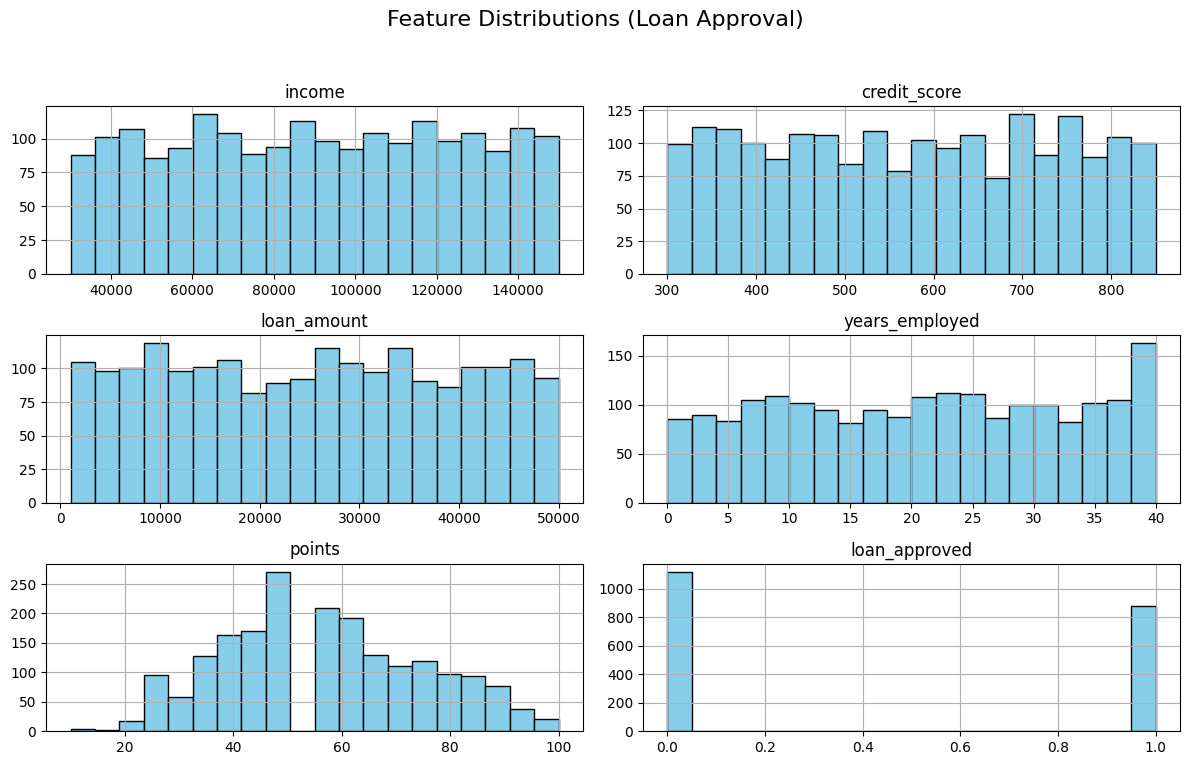

In [24]:
db_analysis[columns_with_zero] = db_analysis[columns_with_zero].replace(0, np.nan)
print("\nPlotting Distributions...")
try:
    db_analysis.hist(figsize=(12, 8), bins=20, color='skyblue', edgecolor='black')
    plt.suptitle("Feature Distributions (Loan Approval)", fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.savefig('loan_feature_distributions.png')
    print("Saved feature distributions plot to 'loan_feature_distributions.png'")
    plt.show()
except Exception as e:
    print(f"Error plotting histograms: {e}")


Correlation Heatmap:
Saved correlation heatmap to 'loan_correlation_heatmap.png'


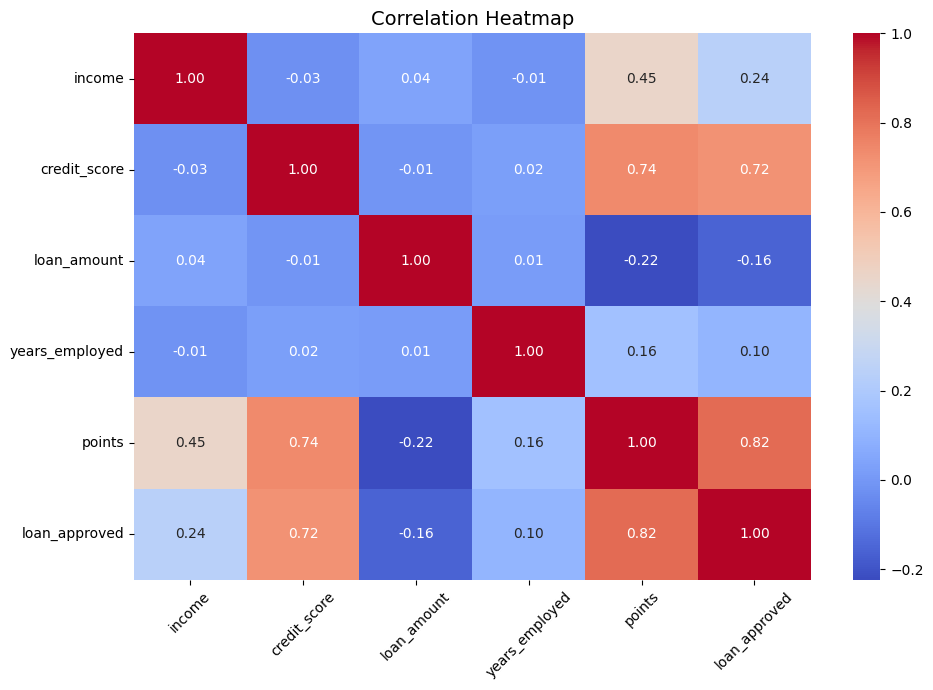

In [13]:
import seaborn as sns
print("\nCorrelation Heatmap:")
plt.figure(figsize=(10, 7))
sns.heatmap(db_analysis.corr(), annot=True, cmap="coolwarm", fmt=".2f", annot_kws={"size": 10})
plt.title("Correlation Heatmap", fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('loan_correlation_heatmap.png')
print("Saved correlation heatmap to 'loan_correlation_heatmap.png'")
plt.show()


Visualizing Outliers:
Saved boxplots to 'loan_feature_boxplots.png'


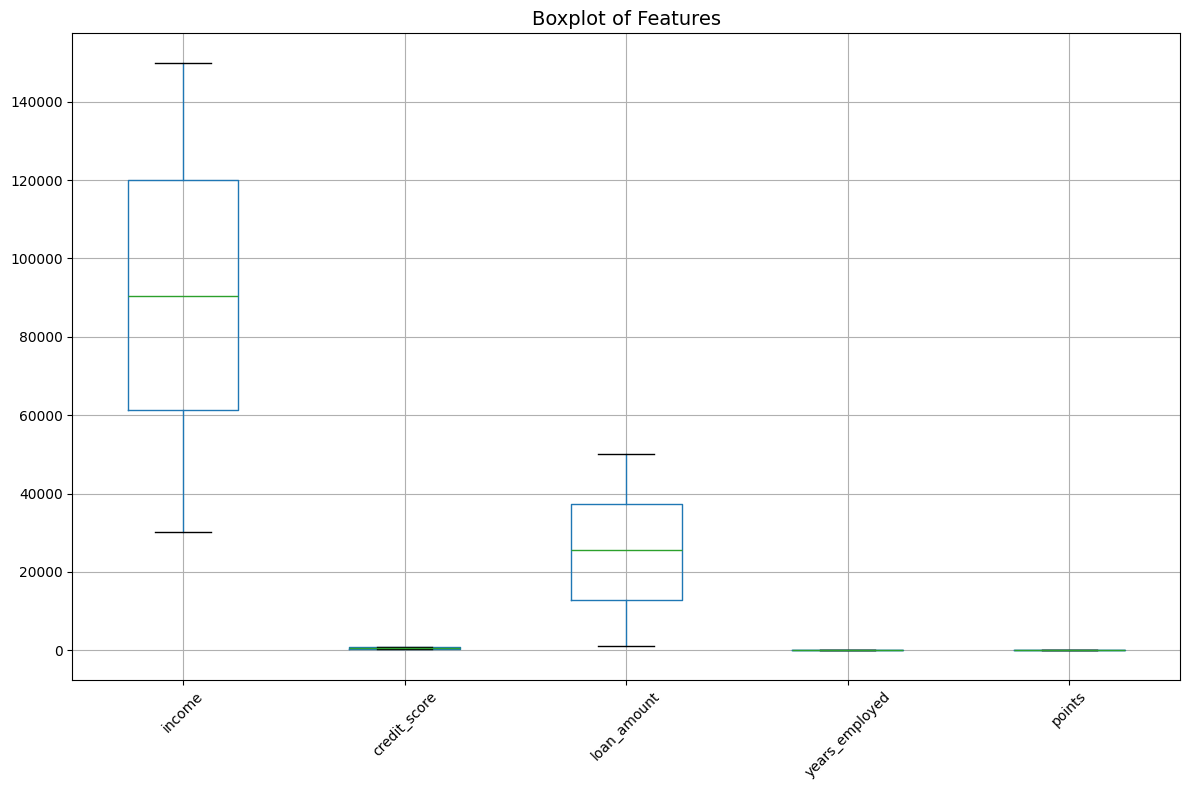

In [14]:
print("\nVisualizing Outliers:")
plt.figure(figsize=(12, 8))
db_analysis.drop('loan_approved', axis=1).boxplot()
plt.title("Boxplot of Features", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('loan_feature_boxplots.png')
print("Saved boxplots to 'loan_feature_boxplots.png'")
plt.show()

In [15]:
from sklearn.preprocessing import StandardScaler

X = db_analysis.drop(['loan_approved', 'points'], axis=1)
y = db_analysis['loan_approved']
# -----------------------------------------

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
print("\n Scaled Data (first 5 rows):")
print(scaled_df.head())


print("\nFinal Dataset Ready for Model Building!")
print(f"Total Records: {db_analysis.shape[0]}")
print(f"Features: {len(X.columns)}")
print(f"Loans Approved: {y.sum()}")
print(f"Loans Denied: {len(db_analysis) - y.sum()}")
print("\n Preprocessing & Scaling Complete!")


 Scaled Data (first 5 rows):
     income  credit_score  loan_amount  years_employed
0  0.673565     -1.152134     1.013076        0.557034
1 -1.333961      0.965919    -0.694358        0.641960
2 -1.662100      0.062632    -0.994067       -0.631939
3  1.061799     -1.432464     1.655511        0.726887
4 -0.711674     -0.485570     1.539415       -1.396279

Final Dataset Ready for Model Building!
Total Records: 2000
Features: 4
Loans Approved: 879
Loans Denied: 1121

 Preprocessing & Scaling Complete!


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("\n Data split completed!")
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


 Data split completed!
Training set size: (1600, 4)
Testing set size: (400, 4)


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
print("\n--- Training Logistic Regression ---")
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
# Initialize the model
log_reg = LogisticRegression(max_iter=1000)

# Fit the model on the training data
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lr = log_reg.predict(X_test)

# Calculate accuracy on the single test set split
acc_lr = accuracy_score(y_test, y_pred_lr)
print(f"\nLogistic Regression Accuracy (on Test Set): {round(acc_lr * 100, 2)}%")

print("\nClassification Report (Logistic Regression):")
print(classification_report(y_test, y_pred_lr))


--- Training Logistic Regression ---

Logistic Regression Accuracy (on Test Set): 88.5%

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.89      0.90      0.89       217
           1       0.88      0.87      0.87       183

    accuracy                           0.89       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.88      0.89      0.88       400



In [18]:
from sklearn.ensemble import RandomForestClassifier
# ------------------------------------------------------
# Model 2: Random Forest Classifier (Simple)
# ------------------------------------------------------
print("\n--- Training Simple Random Forest ---")
# Initialize the model with a fixed random_state for reproducible results
rf = RandomForestClassifier(random_state=42)

# Fit the model on the training data
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf.predict(X_test)

# Calculate accuracy on the single test set split
acc_rf = accuracy_score(y_test, y_pred_rf)
print(f"\nSimple Random Forest Accuracy (on Test Set): {round(acc_rf * 100, 2)}%")

print("\nClassification Report (Simple Random Forest):")
print(classification_report(y_test, y_pred_rf))


--- Training Simple Random Forest ---

Simple Random Forest Accuracy (on Test Set): 97.5%

Classification Report (Simple Random Forest):
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       217
           1       0.97      0.97      0.97       183

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400



In [20]:
from sklearn.model_selection import cross_val_score
# ------------------------------------------------------
# Cross-Validation (5-fold) on Base Models
# ------------------------------------------------------
print("\n--- Performing 5-Fold Cross Validation (on Training Data) ---")

# Run 5-fold CV for Logistic Regression on the training set
cv_scores_lr = cross_val_score(log_reg, X_train, y_train, cv=5, scoring='accuracy')

# Run 5-fold CV for the simple Random Forest on the training set
cv_scores_rf = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')

# Print the mean accuracy for both
print("Average CV Accuracy - Logistic Regression:", round(cv_scores_lr.mean() * 100, 2), "%")
print("Average CV Accuracy - Simple Random Forest:", round(cv_scores_rf.mean() * 100, 2), "%")



--- Performing 5-Fold Cross Validation (on Training Data) ---
Average CV Accuracy - Logistic Regression: 90.94 %
Average CV Accuracy - Simple Random Forest: 97.56 %


In [27]:
from sklearn.model_selection import GridSearchCV
# ------------------------------------------------------
# Model 3: Tuned Random Forest (Hyperparameter Tuning)
# ------------------------------------------------------
print("\n--- Training & Tuning Random Forest (with 5-Fold CV) ---")
# Define the parameters to test
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_leaf': [1, 2]
}

# Initialize a new model for tuning
rf_tuned = RandomForestClassifier(random_state=42)

# Set up GridSearchCV to test all parameter combinations
# It uses 5-fold cross-validation (cv=5) to find the best model
grid_search = GridSearchCV(estimator=rf_tuned, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Fit the grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best model found by the grid search
best_rf = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred_best = best_rf.predict(X_test)

# Calculate the final accuracy
acc_best = accuracy_score(y_test, y_pred_best)

print("\nBest Random Forest Parameters Found:", grid_search.best_params_)
print(f"\nTuned Random Forest Accuracy (on Test Set): {round(acc_best * 100, 2)}%")

print("\nClassification Report (Tuned Random Forest):")
print(classification_report(y_test, y_pred_best))


--- Training & Tuning Random Forest (with 5-Fold CV) ---

Best Random Forest Parameters Found: {'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 50}

Tuned Random Forest Accuracy (on Test Set): 97.5%

Classification Report (Tuned Random Forest):
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       217
           1       0.97      0.98      0.97       183

    accuracy                           0.97       400
   macro avg       0.97      0.98      0.97       400
weighted avg       0.98      0.97      0.98       400




Logistic Regression Evaluation:
Saved LR confusion matrix to 'confusion_matrix_lr.png'


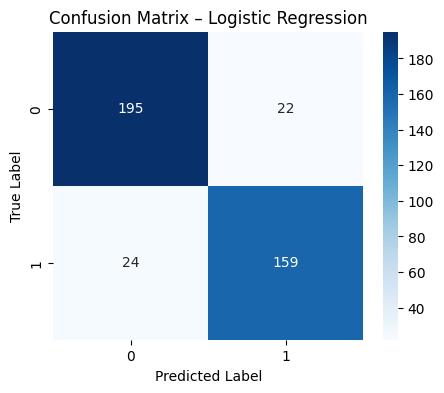

In [24]:
from sklearn.metrics import (
    f1_score, roc_curve, roc_auc_score
)
# Logistic Regression Evaluation
print("\nLogistic Regression Evaluation:")
f1_lr = f1_score(y_test, y_pred_lr)
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(5, 4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix – Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.savefig('confusion_matrix_lr.png')
print("Saved LR confusion matrix to 'confusion_matrix_lr.png'")
plt.show()

Saved LR ROC curve to 'roc_curve_lr.png'


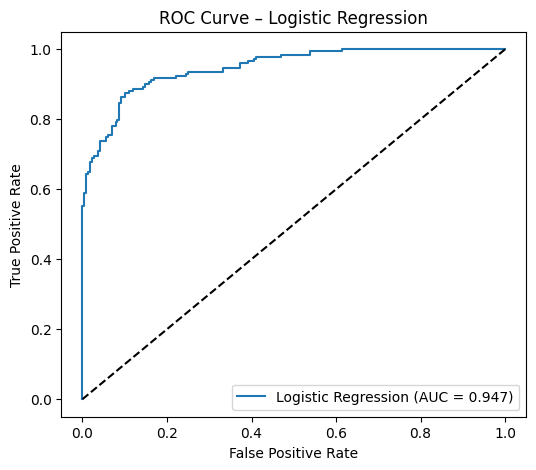

In [25]:
y_prob_lr = log_reg.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
auc_lr = roc_auc_score(y_test, y_prob_lr)
plt.figure(figsize=(6, 5))
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {auc_lr:.3f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Logistic Regression")
plt.legend()
plt.savefig('roc_curve_lr.png')
print("Saved LR ROC curve to 'roc_curve_lr.png'")
plt.show()


Tuned Random Forest Evaluation:
Saved RF confusion matrix to 'confusion_matrix_rf.png'


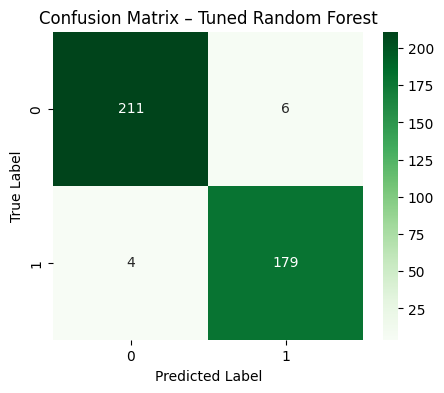

In [26]:
print("\nTuned Random Forest Evaluation:")
f1_rf = f1_score(y_test, y_pred_best)
cm_rf = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(5, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix – Tuned Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.savefig('confusion_matrix_rf.png')
print("Saved RF confusion matrix to 'confusion_matrix_rf.png'")
plt.show()

Saved RF ROC curve to 'roc_curve_rf.png'


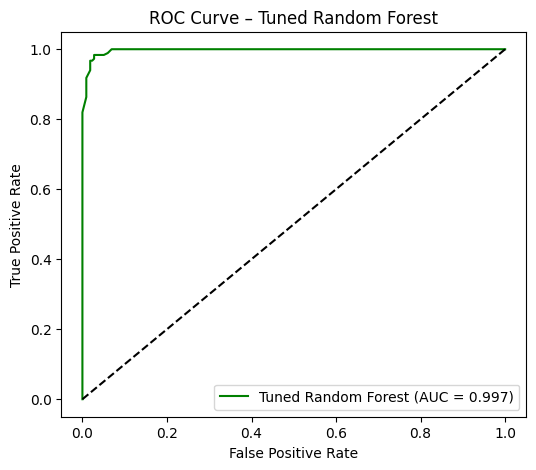

In [27]:
y_prob_rf = best_rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
auc_rf = roc_auc_score(y_test, y_prob_rf)
plt.figure(figsize=(6, 5))
plt.plot(fpr_rf, tpr_rf, label=f"Tuned Random Forest (AUC = {auc_rf:.3f})", color='green')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Tuned Random Forest")
plt.legend()
plt.savefig('roc_curve_rf.png')
print("Saved RF ROC curve to 'roc_curve_rf.png'")
plt.show()

In [28]:
comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Tuned Random Forest'],
    'Accuracy': [round(acc_lr * 100, 2), round(acc_best * 100, 2)],
    'F1-Score': [round(f1_lr, 3), round(f1_rf, 3)],
    'AUC': [round(auc_lr, 3), round(auc_rf, 3)]
})
print("\nModel Comparison Summary:")
print(comparison)


Model Comparison Summary:
                 Model  Accuracy  F1-Score    AUC
0  Logistic Regression      88.5     0.874  0.947
1  Tuned Random Forest      97.5     0.973  0.997



Plotting Model Comparison...


C:\Users\Yashvardhan Bhawnani\AppData\Local\Temp\ipykernel_12584\3920985458.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=comparison, palette=['blue', 'green'])


Saved model comparison bar chart to 'model_accuracy_comparison.png'


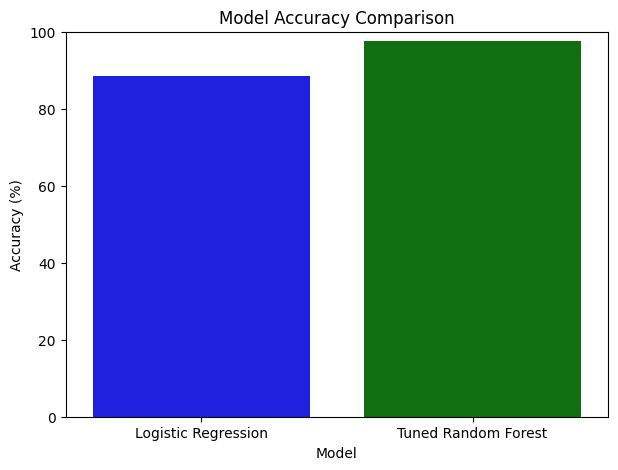


--- Full Analysis Finished ---


In [29]:
print("\nPlotting Model Comparison...")
plt.figure(figsize=(7, 5))
sns.barplot(x='Model', y='Accuracy', data=comparison, palette=['blue', 'green'])
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy (%)")
plt.ylim(0, 100)
plt.savefig('model_accuracy_comparison.png')
print("Saved model comparison bar chart to 'model_accuracy_comparison.png'")
plt.show()

print("\n--- Full Analysis Finished ---")

In [25]:
# ------------------------------------------------------
# Cross-Validation (5-fold) on Training Data
# ------------------------------------------------------
print("\nPerforming 5-Fold Cross Validation (on Training Data):")

# Run 5-fold CV for Logistic Regression on the training set
cv_scores_lr = cross_val_score(log_reg, X_train, y_train, cv=5, scoring='accuracy')

# Run 5-fold CV for the simple Random Forest on the training set
cv_scores_rf = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')

# Print the mean accuracy and standard deviation for both
print("Average CV Accuracy - Logistic Regression:", round(cv_scores_lr.mean() * 100, 2), "%")
print("Average CV Accuracy - Random Forest:", round(cv_scores_rf.mean() * 100, 2), "%")

print("\nCV Standard Deviation - Logistic Regression:", round(cv_scores_lr.std() * 100, 2), "%")
print("CV Standard Deviation - Random Forest:", round(cv_scores_rf.std() * 100, 2), "%")


Performing 5-Fold Cross Validation (on Training Data):
Average CV Accuracy - Logistic Regression: 90.94 %
Average CV Accuracy - Random Forest: 97.56 %

CV Standard Deviation - Logistic Regression: 2.1 %
CV Standard Deviation - Random Forest: 0.54 %
